In [429]:
#https://www.kaggle.com/sadiestewart/furniture-store-shopping-and-customers

import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Load Dataset: 

In [430]:
user = pd.read_csv('/Users/sean/Desktop/new furniture acquisition funnel.csv')
user.head()

,customer id,year,month,class_name,skus_viewed,skus_added_to_cart,skus_purchased,Revenue,Acquisition_Date,Acquisition_Channel,Acquisition_Device,year_month
0,21,2016,9,Accent Pillows,3,0,0,0,6/14/08,Search - Paid,Desktop,2016-9
1,21,2016,9,Area Rugs,6,1,0,0,6/14/08,Search - Paid,Desktop,2016-9
2,21,2016,9,Bar Stools,30,0,0,0,6/14/08,Search - Paid,Desktop,2016-9
3,21,2016,9,Beds,27,4,0,0,6/14/08,Search - Paid,Desktop,2016-9
4,21,2016,9,Curtains & Drapes,1,0,0,0,6/14/08,Search - Paid,Desktop,2016-9


In [431]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer id          10000 non-null  int64 
 1   year                 10000 non-null  int64 
 2   month                10000 non-null  int64 
 3   class_name           10000 non-null  object
 4   skus_viewed          10000 non-null  int64 
 5   skus_added_to_cart   10000 non-null  int64 
 6   skus_purchased       10000 non-null  int64 
 7   Revenue              10000 non-null  int64 
 8   Acquisition_Date     9992 non-null   object
 9   Acquisition_Channel  7050 non-null   object
 10  Acquisition_Device   3965 non-null   object
 11  year_month           10000 non-null  object
dtypes: int64(7), object(5)
memory usage: 937.6+ KB


In [432]:
user.describe()

,customer id,year,month,skus_viewed,skus_added_to_cart,skus_purchased,Revenue
count,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000
mean,4.492002e+05,2017.171700,6.43870,13.643600,0.82620,0.056600,10.349200
std,3.620399e+05,0.682983,3.48945,70.043982,4.63786,0.288452,65.363813
min,2.100000e+01,2016.000000,1.00000,0.000000,0.00000,0.000000,0.000000
25%,1.146330e+05,2017.000000,3.00000,1.000000,0.00000,0.000000,0.000000
50%,3.876110e+05,2017.000000,7.00000,2.000000,0.00000,0.000000,0.000000
75%,7.485710e+05,2018.000000,9.00000,6.000000,0.00000,0.000000,0.000000
max,1.214065e+06,2018.000000,12.00000,2599.000000,165.00000,5.000000,1385.000000


In [433]:
user.tail()

,customer id,year,month,class_name,skus_viewed,skus_added_to_cart,skus_purchased,Revenue,Acquisition_Date,Acquisition_Channel,Acquisition_Device,year_month
9995,1155758,2018,8,Curtains & Drapes,3,0,0,0,12/30/07,Search - Paid,NaN,2018-8
9996,1164072,2018,8,Bedding Sets,4,1,1,70,3/24/15,Search - Paid,NaN,2018-8
9997,1187280,2018,8,Sheets And Sheet Sets,5,0,0,0,12/20/07,Search - Paid,NaN,2018-8
9998,1196726,2018,8,Beds,0,0,0,0,6/5/11,Display - Acquisition,NaN,2018-8
9999,1197356,2018,8,Bar Stools,0,0,0,0,10/22/04,Display - Acquisition,Desktop,2018-8


# 2. Exploratory Data Analysis: 

# a. product variable check with revenue and funnel analysis: 


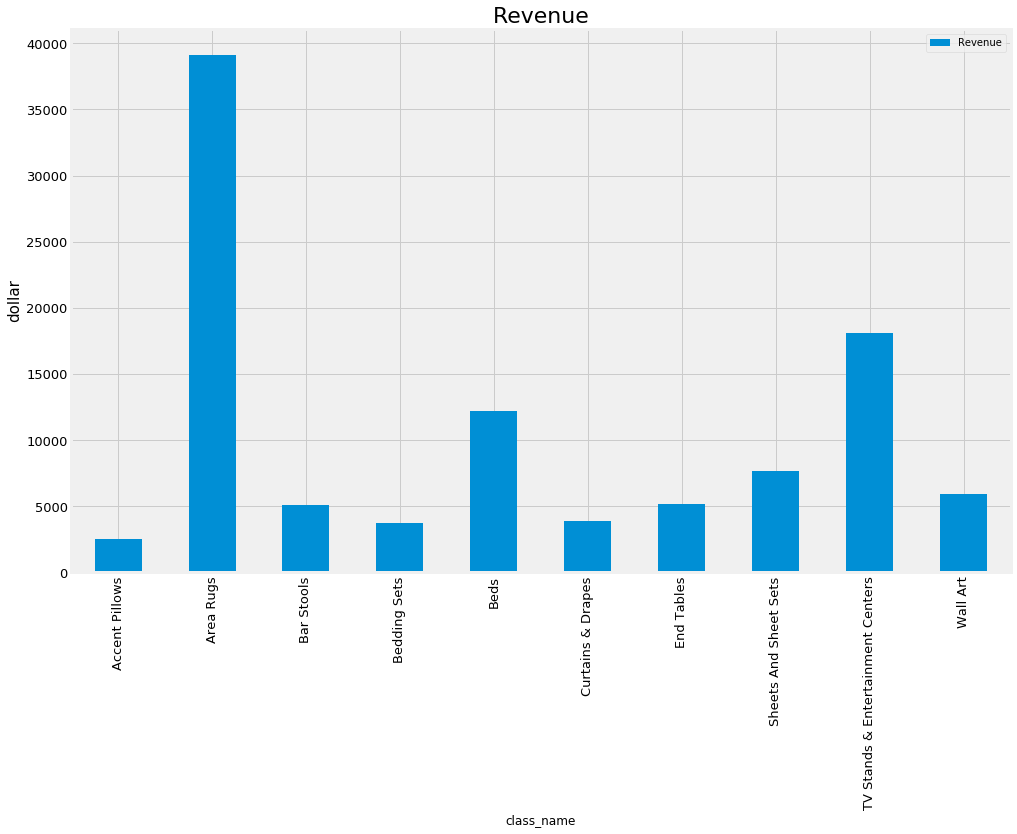

In [435]:

b = pd.DataFrame(user[['class_name','Revenue']].groupby('class_name').sum())
ax = b.plot(kind='bar', figsize=(15,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Revenue", fontsize=22)
ax.set_ylabel("dollar", fontsize=15);
plt.show()

In [443]:

a = pd.DataFrame(user[['class_name']].groupby('class_name').size(), columns = ['sum'])
a['pct_of_total'] = a.apply(lambda x: x/x.sum())
b = pd.DataFrame(user[['class_name','skus_viewed_flag','skus_added_to_cart_flag','skus_purchased']].groupby('class_name').mean())
pd.merge(a,b,right_index = True,left_index = True)

,sum,pct_of_total,skus_viewed_flag,skus_added_to_cart_flag,skus_purchased
class_name,,,,,
Accent Pillows,769,0.0769,0.780234,0.228869,0.094928
Area Rugs,2067,0.2067,0.894533,0.205128,0.080310
Bar Stools,774,0.0774,0.820413,0.184755,0.050388
Bedding Sets,1140,0.1140,0.849123,0.180702,0.062281
Beds,1348,0.1348,0.861276,0.148368,0.026706
Curtains & Drapes,548,0.0548,0.855839,0.177007,0.063869
End Tables,949,0.0949,0.856691,0.192835,0.047418
Sheets And Sheet Sets,389,0.0389,0.889460,0.290488,0.084833
TV Stands & Entertainment Centers,912,0.0912,0.881579,0.140351,0.031798


# Summary: 


## 
1. Area Rugs is the top sales driver and also a high amount of views, a high conversion 
2. Beds has a second high amount of views, but with the lowest skus purchased rate
3. TV stands & Entertainment Centers has a high sales performace, but a low purchased conversion rate
4. Wall Art also has a high amount of views but a low conversion rate. 


- Problem: Deep down to check Beds, TV stands, Wall art 's funnel analysis with variants in next steps

# b. Correlation check 

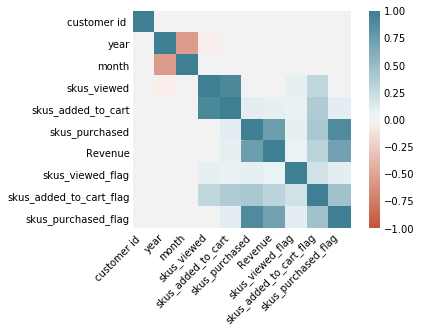

In [444]:

# check the correlation and test both for numerical and categorical features in the given dataset


corr = user.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# c. A ecommerce store funnel showed: 
    Skus viewed -> Skus added to cart -> Skus purchased  generate revenue. 
    

In [445]:
user['skus_viewed_flag'] = 0 
user.loc[user.skus_viewed > 0 ,'skus_viewed_flag'] = 1
user.groupby('skus_viewed_flag').size()


skus_viewed_flag
0    1403
1    8597
dtype: int64

In [446]:
#Skus_viewed_rate: 

8597/(1403+8597)

0.8597

In [447]:
user['skus_added_to_cart_flag'] = 0 
user.loc[user.skus_added_to_cart > 0 ,'skus_added_to_cart_flag'] = 1
user.groupby('skus_added_to_cart_flag').size()

skus_added_to_cart_flag
0    8140
1    1860
dtype: int64

In [448]:
#Skus added to cart rate: 

1860/(8140+1860)

0.186

In [449]:
user['skus_purchased_flag'] = 0 
user.loc[user.skus_purchased > 0 ,'skus_purchased_flag'] = 1
user.groupby('skus_purchased_flag').size()

skus_purchased_flag
0    9534
1     466
dtype: int64

In [450]:
#Purchased rate: 

466 / (466+9534)

0.0466

# C.1. Historical Trend: 

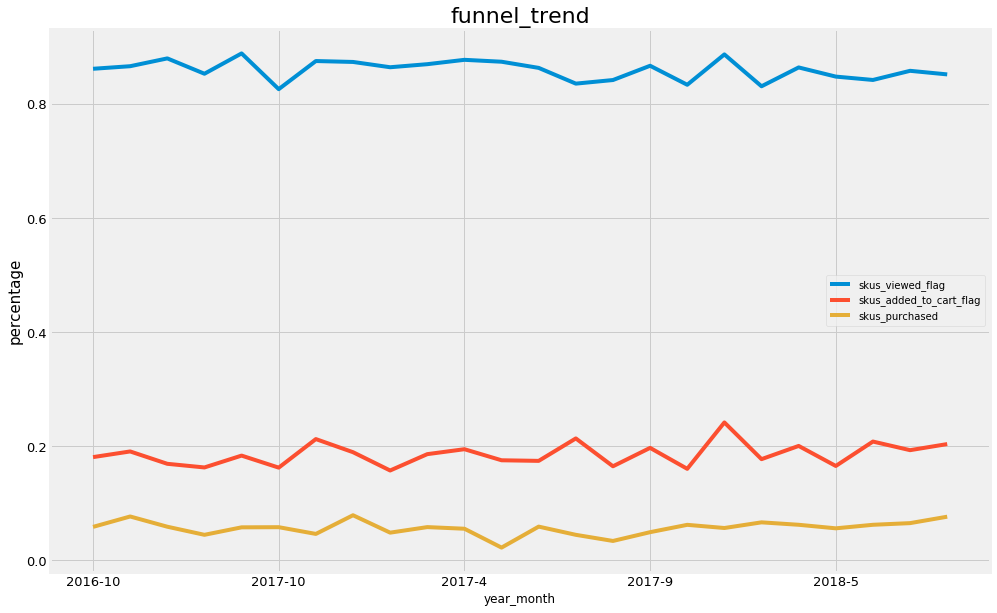

In [451]:
#Get a whole picture first. Funnel in all classes.  


# Let's build our plot


f = pd.DataFrame(user[['year_month','skus_viewed_flag','skus_added_to_cart_flag','skus_purchased']].groupby('year_month').mean())
ax = f.plot(kind='line', figsize=(15,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("funnel_trend", fontsize=22)
ax.set_ylabel("percentage", fontsize=15);
plt.show()


#fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()  
#user.groupby(['year_month']).sum()['skus_viewed_flag'].plot()
#user[['year_month','skus_viewed']].groupby(['year_month']).sum().plot()
#ax2.set_title('skus_viewed_rate_trend')


# C.2. Beds funnel analytsis: 

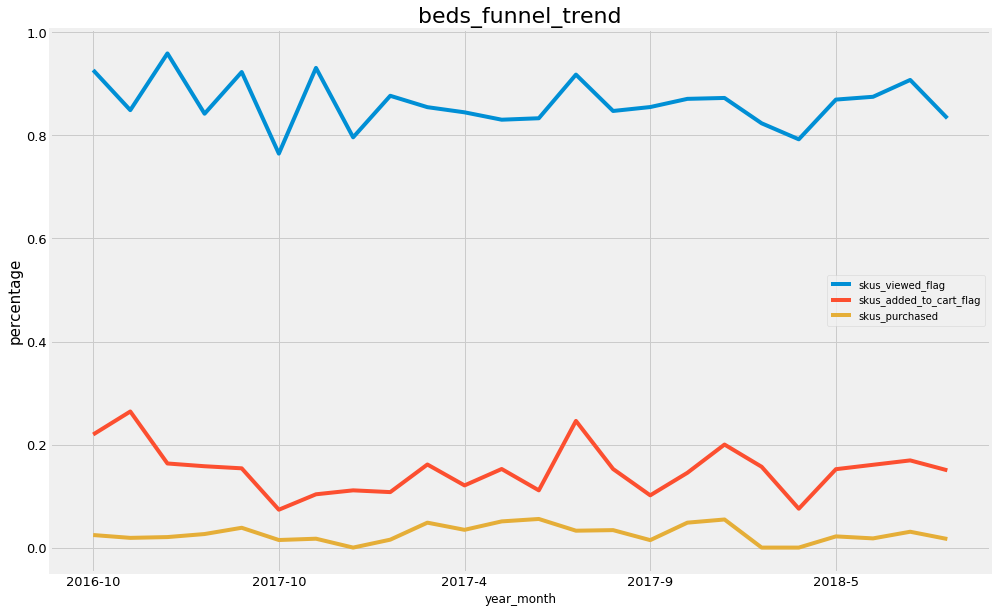

In [452]:
#Beds_funnel_trends: 
f0 = user[user.class_name == 'Beds']
f = pd.DataFrame(f0[['year_month','skus_viewed_flag','skus_added_to_cart_flag','skus_purchased']].groupby('year_month').mean())
ax = f.plot(kind='line', figsize=(15,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("beds_funnel_trend", fontsize=22)
ax.set_ylabel("percentage", fontsize=15);
plt.show()

In [453]:
# Acquisition Channel

a = pd.DataFrame(f0[['Acquisition_Channel']].groupby('Acquisition_Channel').size(), columns = ['sum'])
a['pct_of_total'] = a.apply(lambda x: x/x.sum())
b = pd.DataFrame(f0[['Acquisition_Channel','skus_viewed_flag','skus_added_to_cart_flag','skus_purchased']].groupby('Acquisition_Channel').mean())
pd.merge(a,b,right_index = True,left_index = True)

,sum,pct_of_total,skus_viewed_flag,skus_added_to_cart_flag,skus_purchased
Acquisition_Channel,,,,,
Comparison Shopping,47,0.051648,0.893617,0.063830,0.021277
Display - Acquisition,82,0.090110,0.792683,0.048780,0.000000
Other,53,0.058242,0.754717,0.188679,0.018868
Search - Organic,148,0.162637,0.851351,0.250000,0.054054
Search - Paid,519,0.570330,0.872832,0.183044,0.040462
Social - Paid,61,0.067033,0.852459,0.049180,0.000000


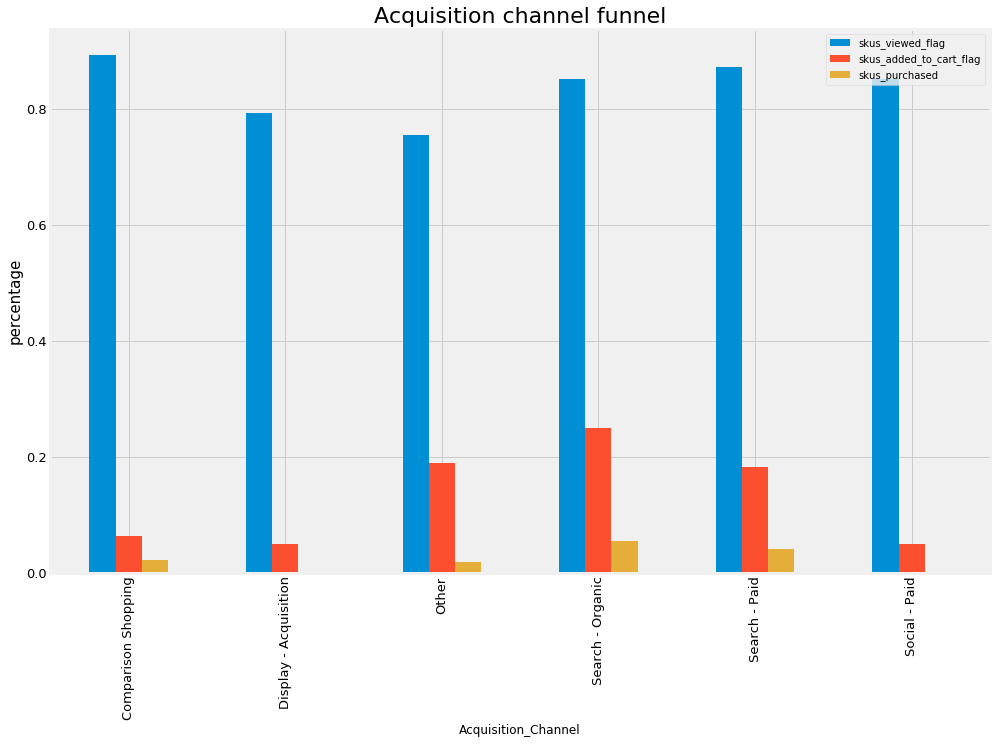

In [454]:
ax = b.plot(kind='bar', figsize=(15,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Acquisition channel funnel", fontsize=22)
ax.set_ylabel("percentage", fontsize=15);
plt.show()

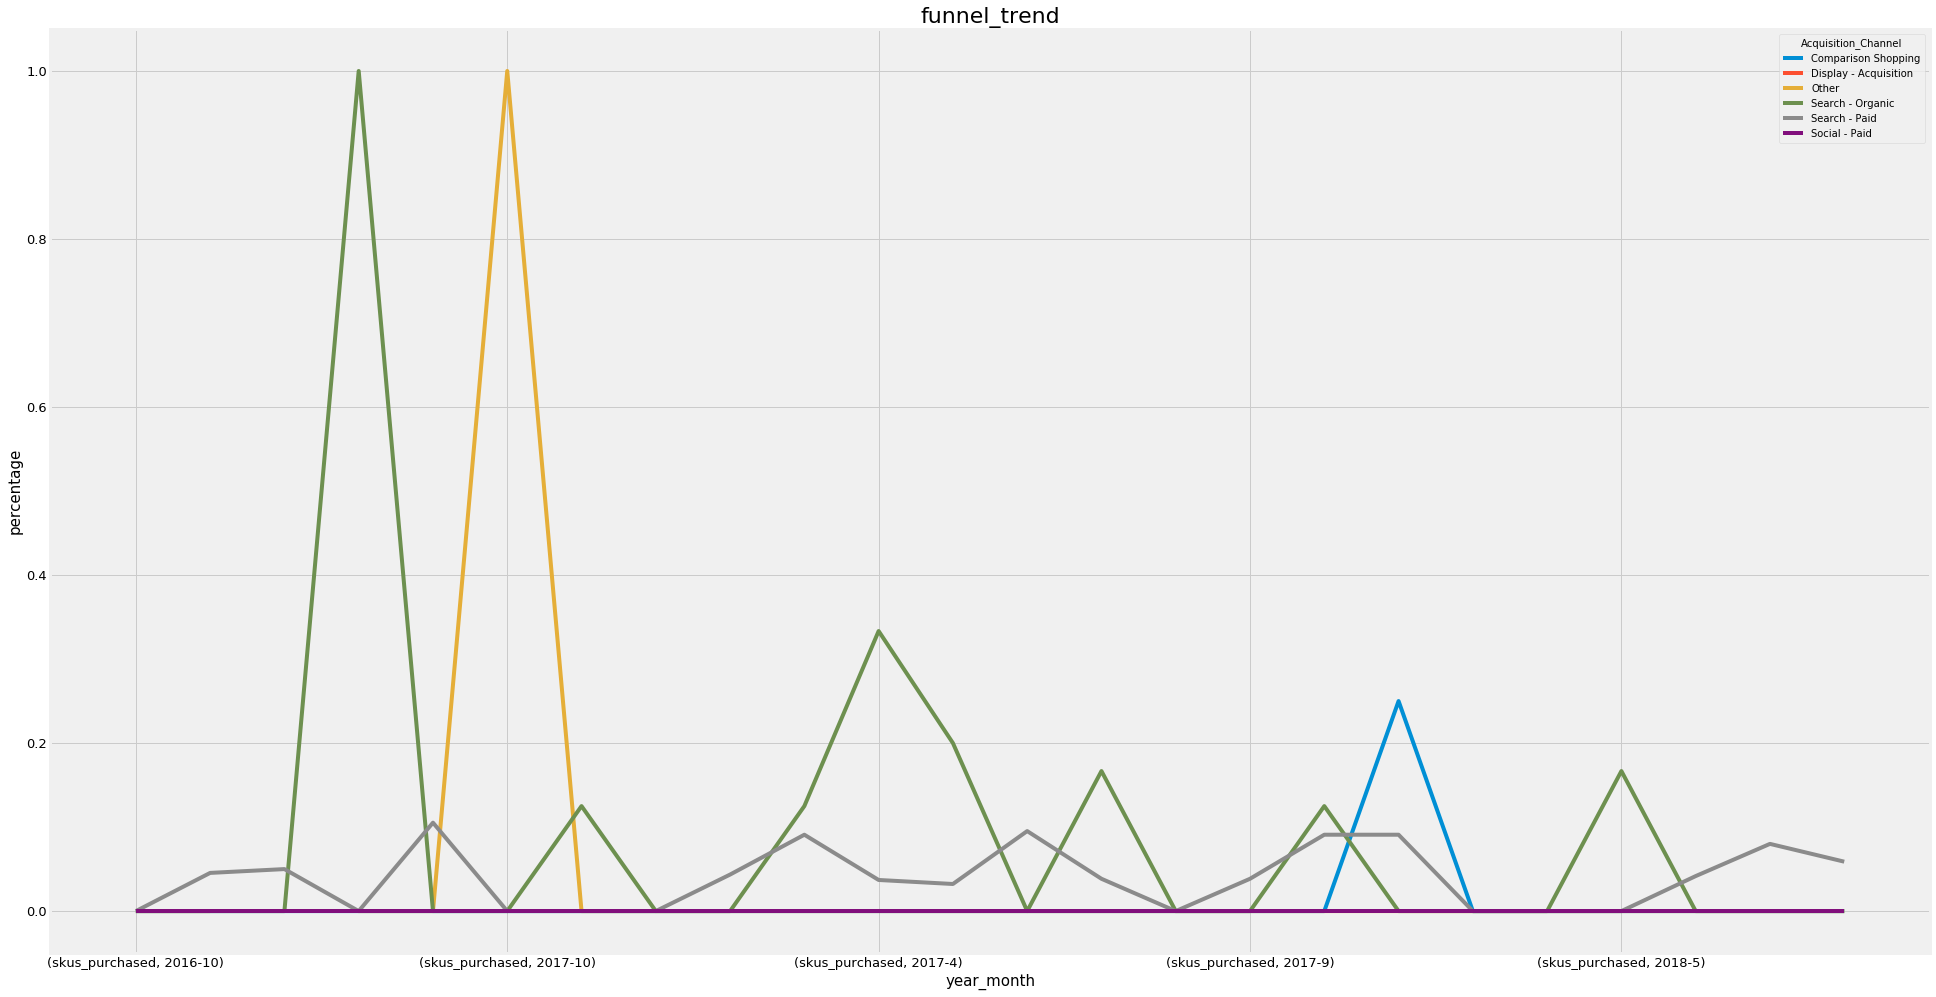

In [455]:
g=f0[['skus_purchased','year_month','Acquisition_Channel']].groupby(['Acquisition_Channel','year_month']).mean()

h=g.unstack()
#transpose 
h1 = h.T
ax = h1.plot(kind='line', figsize=(30,17), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("funnel_trend", fontsize=22)
ax.set_ylabel("percentage", fontsize=15)
ax.set_xlabel("year_month", fontsize=15)
;
plt.show()


Text(0.5, 1.0, 'Social - Paid')

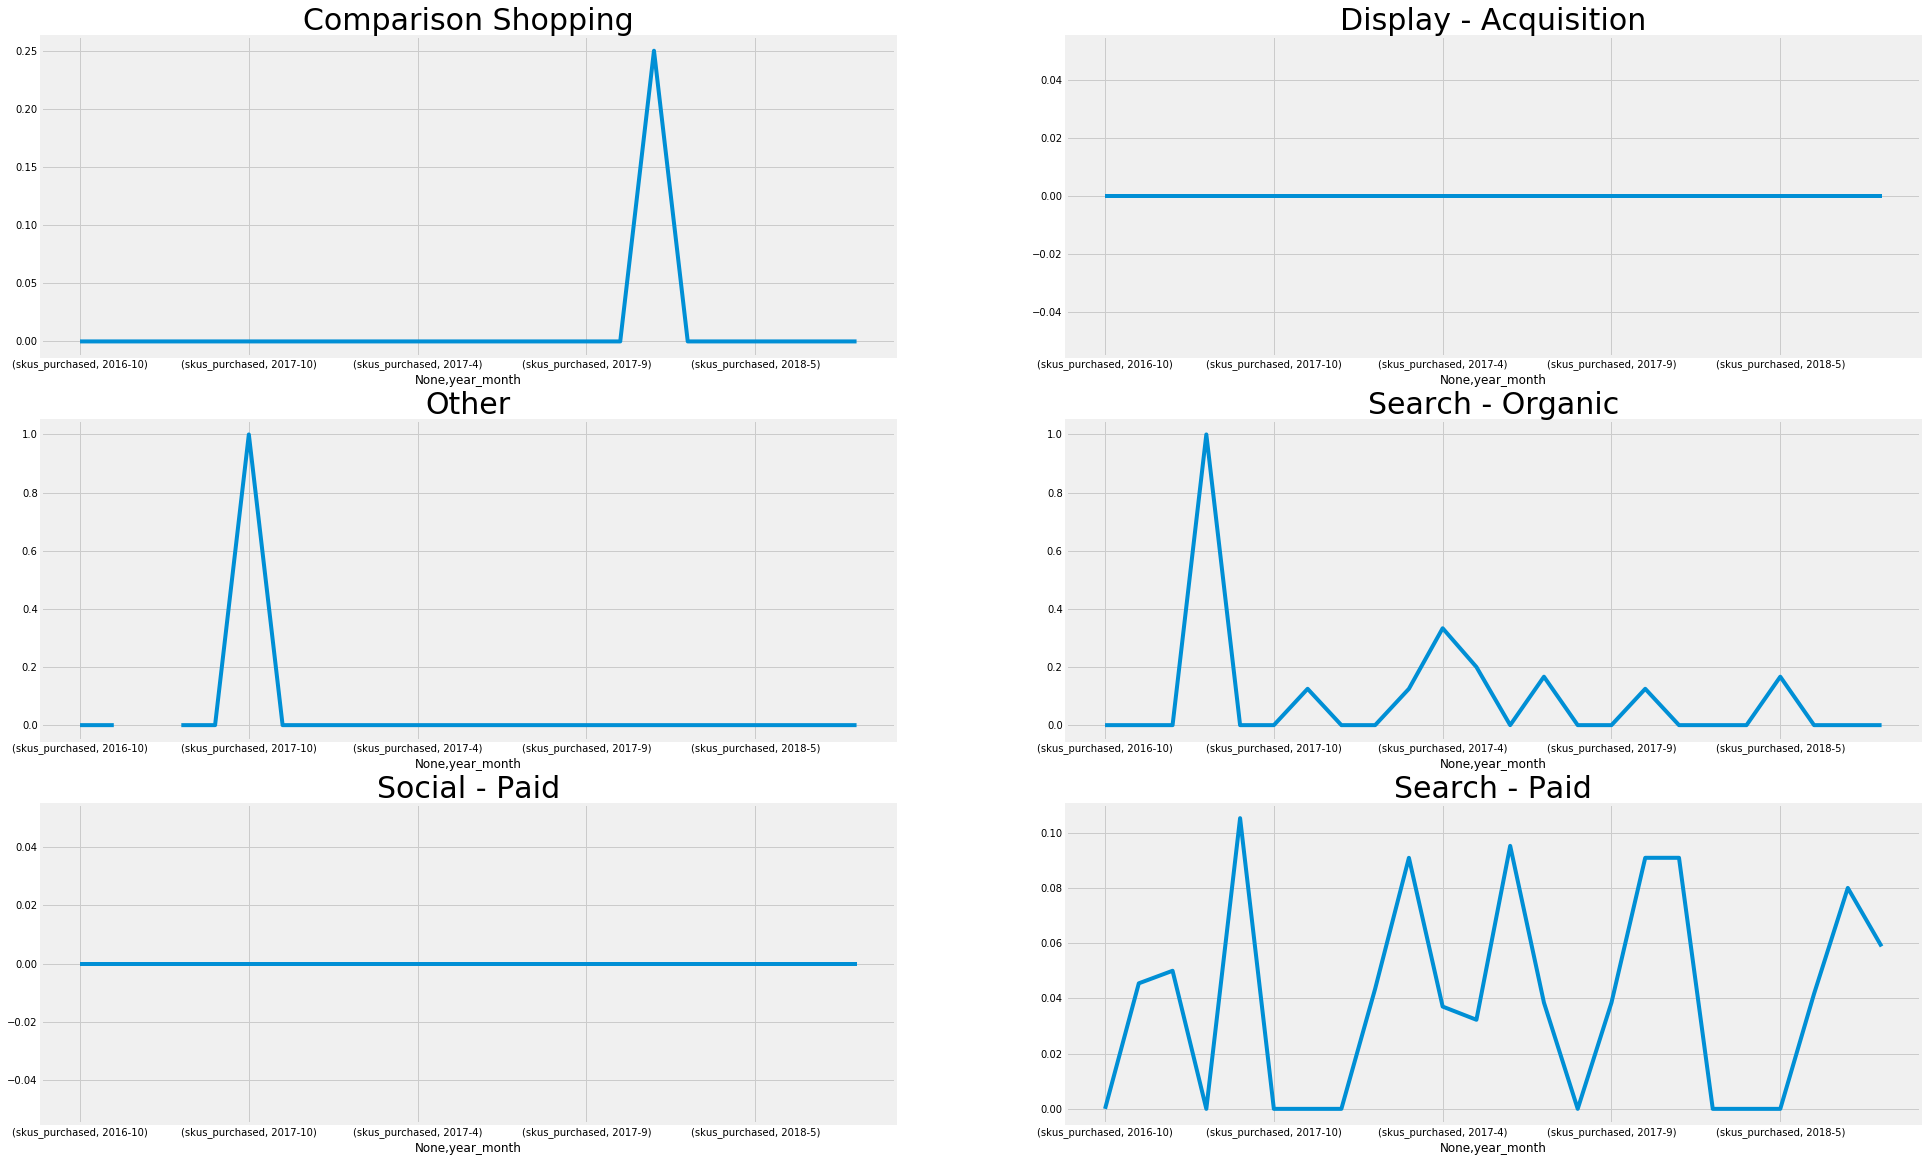

In [456]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(30, 20))

h1['Comparison Shopping'].plot(ax=axes[0,0]); axes[0,0].set_title('Comparison Shopping',size=30)
h1['Display - Acquisition'].plot(ax=axes[0,1]); axes[0,1].set_title('Display - Acquisition',size=30)
h1['Other'].plot(ax=axes[1,0]); axes[1,0].set_title('Other',size=30)
h1['Search - Organic'].plot(ax=axes[1,1]); axes[1,1].set_title('Search - Organic',size=30)
h1['Search - Paid'].plot(ax=axes[2,1]); axes[2,1].set_title('Search - Paid',size=30)
h1['Social - Paid'].plot(ax=axes[2,0]); axes[2,0].set_title('Social - Paid',size=30)






In [457]:
# Acquisition Channel

c = pd.DataFrame(user[['Acquisition_Device']].groupby('Acquisition_Device').size(), columns = ['sum'])
c['pct_of_total'] = c.apply(lambda x: x/x.sum())
d = pd.DataFrame(user[['Acquisition_Device','skus_viewed_flag','skus_added_to_cart_flag','skus_purchased']].groupby('Acquisition_Device').mean())
pd.merge(c,d,right_index = True,left_index = True)

,sum,pct_of_total,skus_viewed_flag,skus_added_to_cart_flag,skus_purchased
Acquisition_Device,,,,,
Desktop,2930,0.738966,0.830034,0.145734,0.058362
Phone,963,0.242875,0.876428,0.186916,0.072690
Tablet,72,0.018159,0.930556,0.180556,0.111111


# Summary: Class_name: Beds(low purchased rate), 

1. The chart shows Search - organic and Search - paid generated most of the views, and showed the regularity peak and down. 
2. Search-organic showed a downdrift overall
3. the user shopped for beds most were come from Desktop device. But also the lowest rate compare with other device within all three stages. 

# Recommendation: 
1. make up the gaps during non-peak season, running more campaigns to acuquire more views 
2. mobile users only has 25% of the total, phone and tablet have a higher purchased rate, running more campaigns on the mobile to acuqire customer.  



# C.3. TV stand & Entertainment Centers funnel analytsis: 


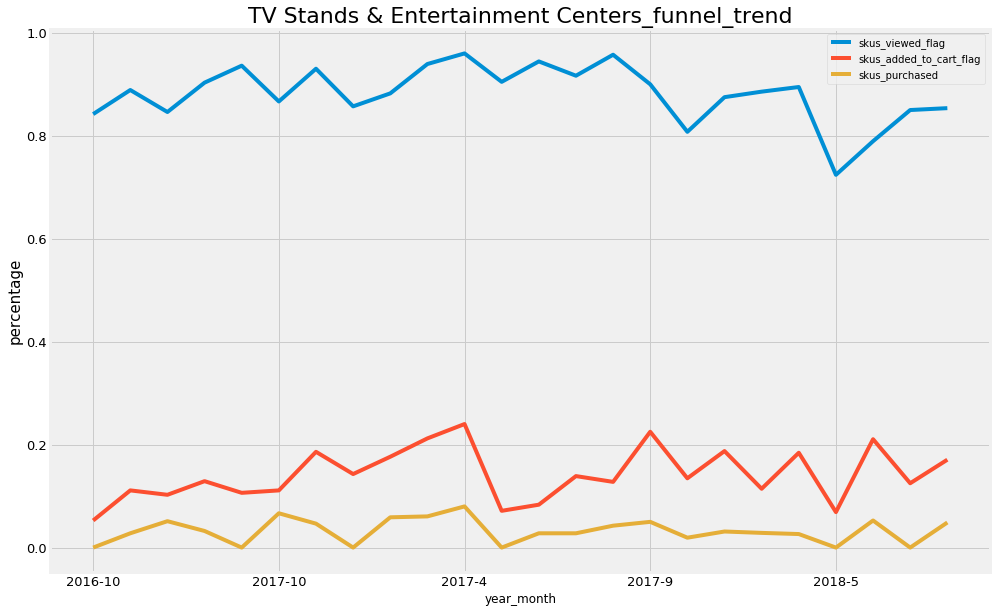

In [458]:
#Beds_funnel_trends: 
f0 = user[user.class_name == 'TV Stands & Entertainment Centers']
f = pd.DataFrame(f0[['year_month','skus_viewed_flag','skus_added_to_cart_flag','skus_purchased']].groupby('year_month').mean())
ax = f.plot(kind='line', figsize=(15,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("TV Stands & Entertainment Centers_funnel_trend", fontsize=22)
ax.set_ylabel("percentage", fontsize=15);
plt.show()

In [459]:
# Acquisition Channel

a = pd.DataFrame(f0[['Acquisition_Channel']].groupby('Acquisition_Channel').size(), columns = ['sum'])
a['pct_of_total'] = a.apply(lambda x: x/x.sum())
b = pd.DataFrame(f0[['Acquisition_Channel','skus_viewed_flag','skus_added_to_cart_flag','skus_purchased']].groupby('Acquisition_Channel').mean())
pd.merge(a,b,right_index = True,left_index = True)

,sum,pct_of_total,skus_viewed_flag,skus_added_to_cart_flag,skus_purchased
Acquisition_Channel,,,,,
Comparison Shopping,36,0.059406,0.861111,0.055556,0.000000
Display - Acquisition,53,0.087459,0.867925,0.018868,0.000000
Other,14,0.023102,0.857143,0.142857,0.071429
Search - Organic,114,0.188119,0.833333,0.280702,0.043860
Search - Paid,344,0.567657,0.872093,0.180233,0.037791
Social - Paid,45,0.074257,0.911111,0.088889,0.000000


In [460]:
#Summary: 

#In TV stands, Search paid has the highest percentage of total but a low skus purchased rate 
#Search - organic has a high skus addde to cart rate, but a low purchased rate. 

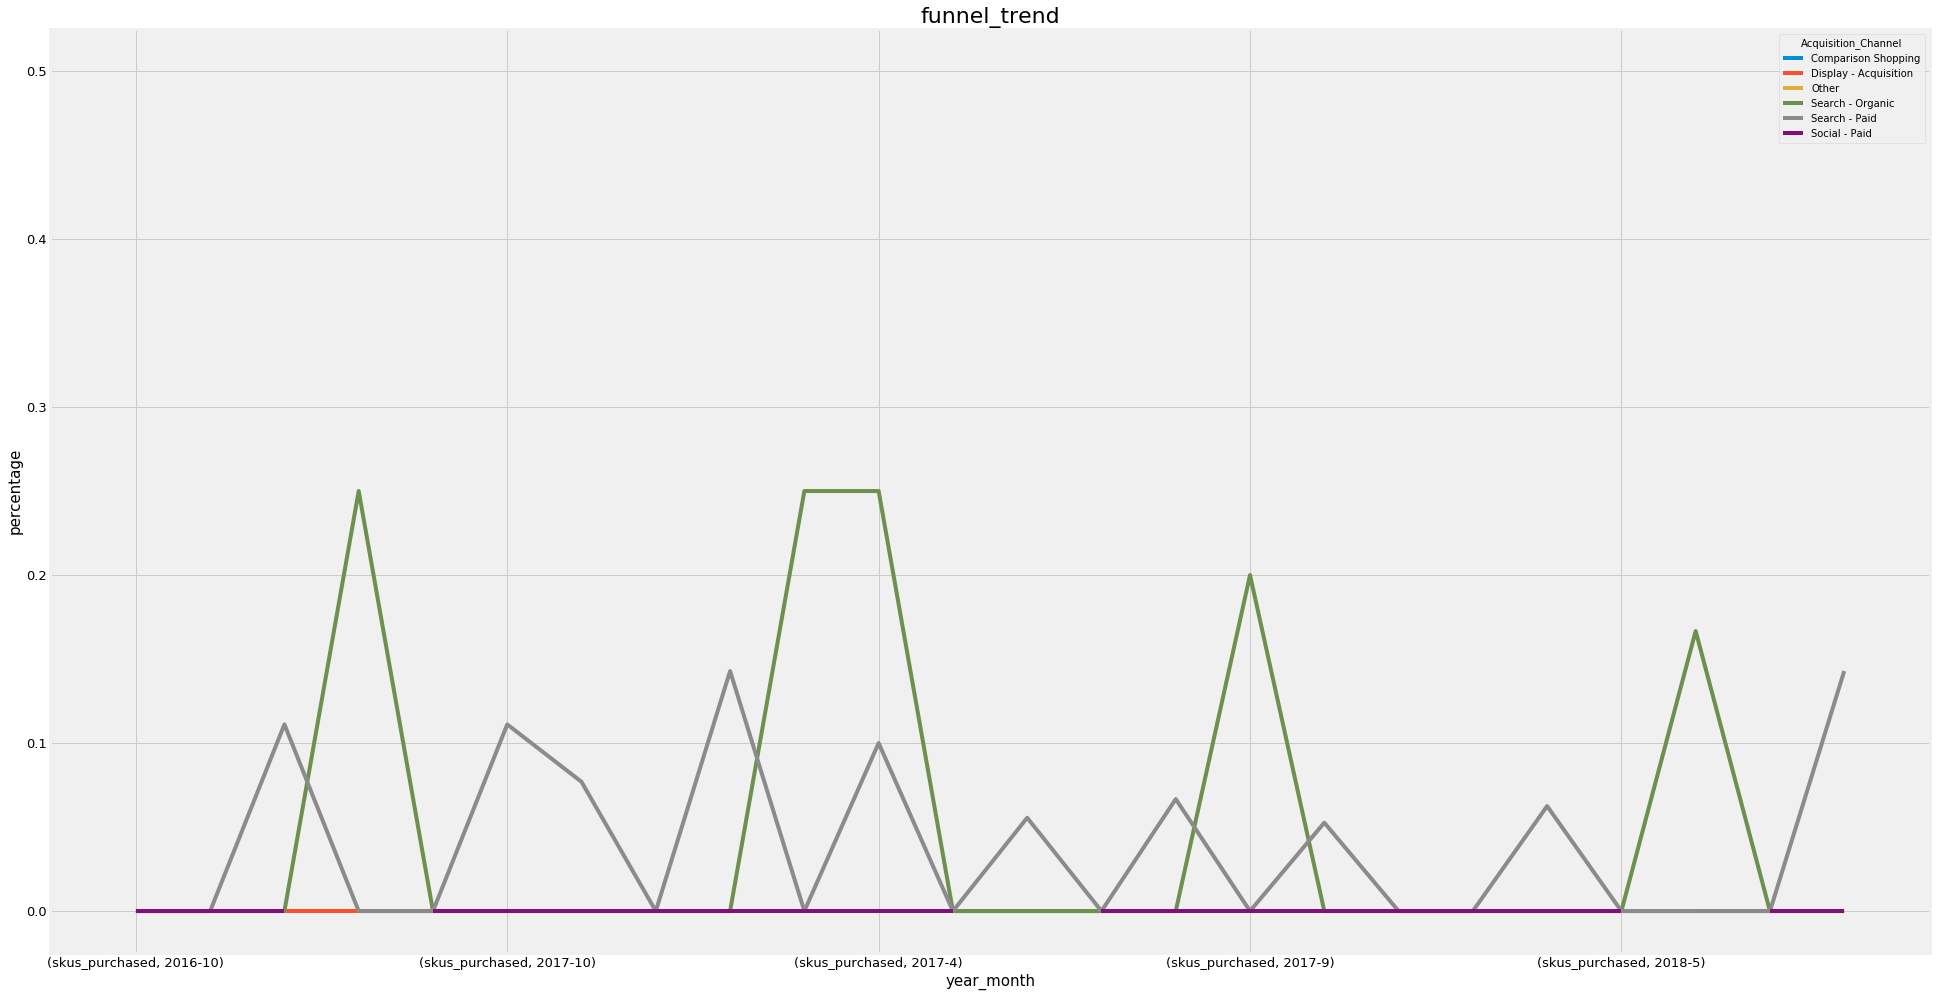

In [461]:
g=f0[['skus_purchased','year_month','Acquisition_Channel']].groupby(['Acquisition_Channel','year_month']).mean()

h=g.unstack()
#transpose 
h1 = h.T
ax = h1.plot(kind='line', figsize=(30,17), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("funnel_trend", fontsize=22)
ax.set_ylabel("percentage", fontsize=15)
ax.set_xlabel("year_month", fontsize=15)
;
plt.show()


In [462]:
# Acquisition Channel

c = pd.DataFrame(user[['Acquisition_Device']].groupby('Acquisition_Device').size(), columns = ['sum'])
c['pct_of_total'] = c.apply(lambda x: x/x.sum())
d = pd.DataFrame(user[['Acquisition_Device','skus_viewed_flag','skus_added_to_cart_flag','skus_purchased']].groupby('Acquisition_Device').mean())
pd.merge(c,d,right_index = True,left_index = True)

,sum,pct_of_total,skus_viewed_flag,skus_added_to_cart_flag,skus_purchased
Acquisition_Device,,,,,
Desktop,2930,0.738966,0.830034,0.145734,0.058362
Phone,963,0.242875,0.876428,0.186916,0.072690
Tablet,72,0.018159,0.930556,0.180556,0.111111


# Summary: Class_name: TV stands (low purchased rate) 

1. In TV stands, Search paid had the highest percentage of total but a low skus purchased rate 
2. Search - organic had a high skus addde to cart rate, but a low purchased rate. 
3. histriocal trends showed a regularity peak and down
4. Desktop had 73% of total views, but a lowest added to cart rate and also a low purchased rate

# Recommendation: 
1. optimizing the search-organic channel, especially in add to cart stage, and also final purchase stage
2. running more marketing campaigns during the non-peak seaon to drive more visits 
3. Adding more investment on the mobile device, since the purchase conversion rate was higher than desktop

# C.4.Wall Art funnel analysis: 


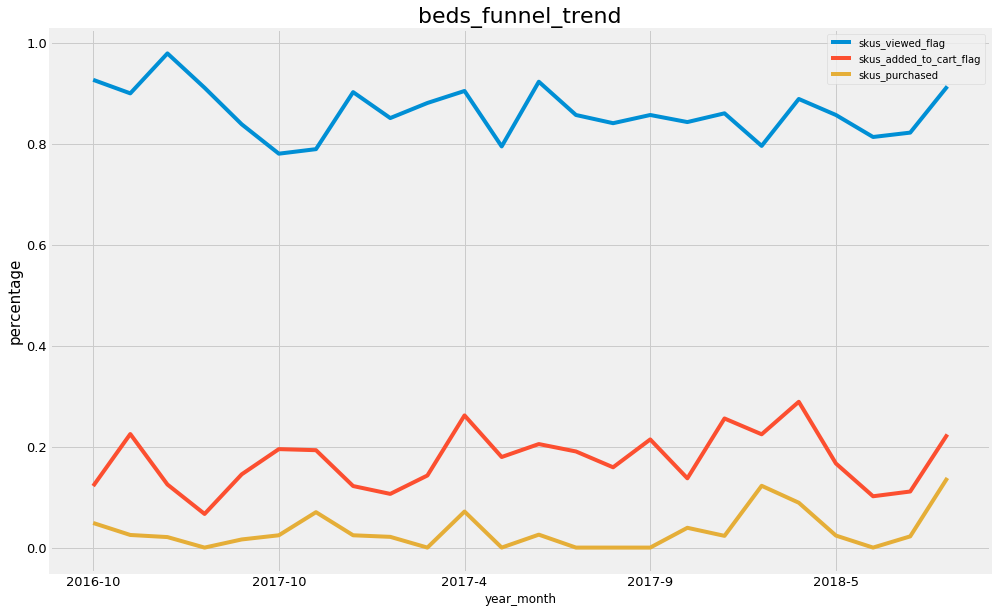

In [463]:
#wall_art_funnel_trends: 
f0 = user[user.class_name == 'Wall Art']
f = pd.DataFrame(f0[['year_month','skus_viewed_flag','skus_added_to_cart_flag','skus_purchased']].groupby('year_month').mean())
ax = f.plot(kind='line', figsize=(15,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("beds_funnel_trend", fontsize=22)
ax.set_ylabel("percentage", fontsize=15);
plt.show()

In [464]:
#Summary: 
#purchased rate showed a similar trend as added to cart rate. 

In [465]:
# Acquisition Channel

a = pd.DataFrame(f0[['Acquisition_Channel']].groupby('Acquisition_Channel').size(), columns = ['sum'])
a['pct_of_total'] = a.apply(lambda x: x/x.sum())
b = pd.DataFrame(f0[['Acquisition_Channel','skus_viewed_flag','skus_added_to_cart_flag','skus_purchased']].groupby('Acquisition_Channel').mean())
pd.merge(a,b,right_index = True,left_index = True)

,sum,pct_of_total,skus_viewed_flag,skus_added_to_cart_flag,skus_purchased
Acquisition_Channel,,,,,
Comparison Shopping,51,0.066667,0.901961,0.215686,0.019608
Display - Acquisition,46,0.060131,0.934783,0.086957,0.043478
Other,29,0.037908,0.758621,0.241379,0.000000
Search - Organic,149,0.194771,0.838926,0.281879,0.067114
Search - Paid,435,0.568627,0.880460,0.206897,0.032184
Social - Paid,55,0.071895,0.854545,0.054545,0.036364


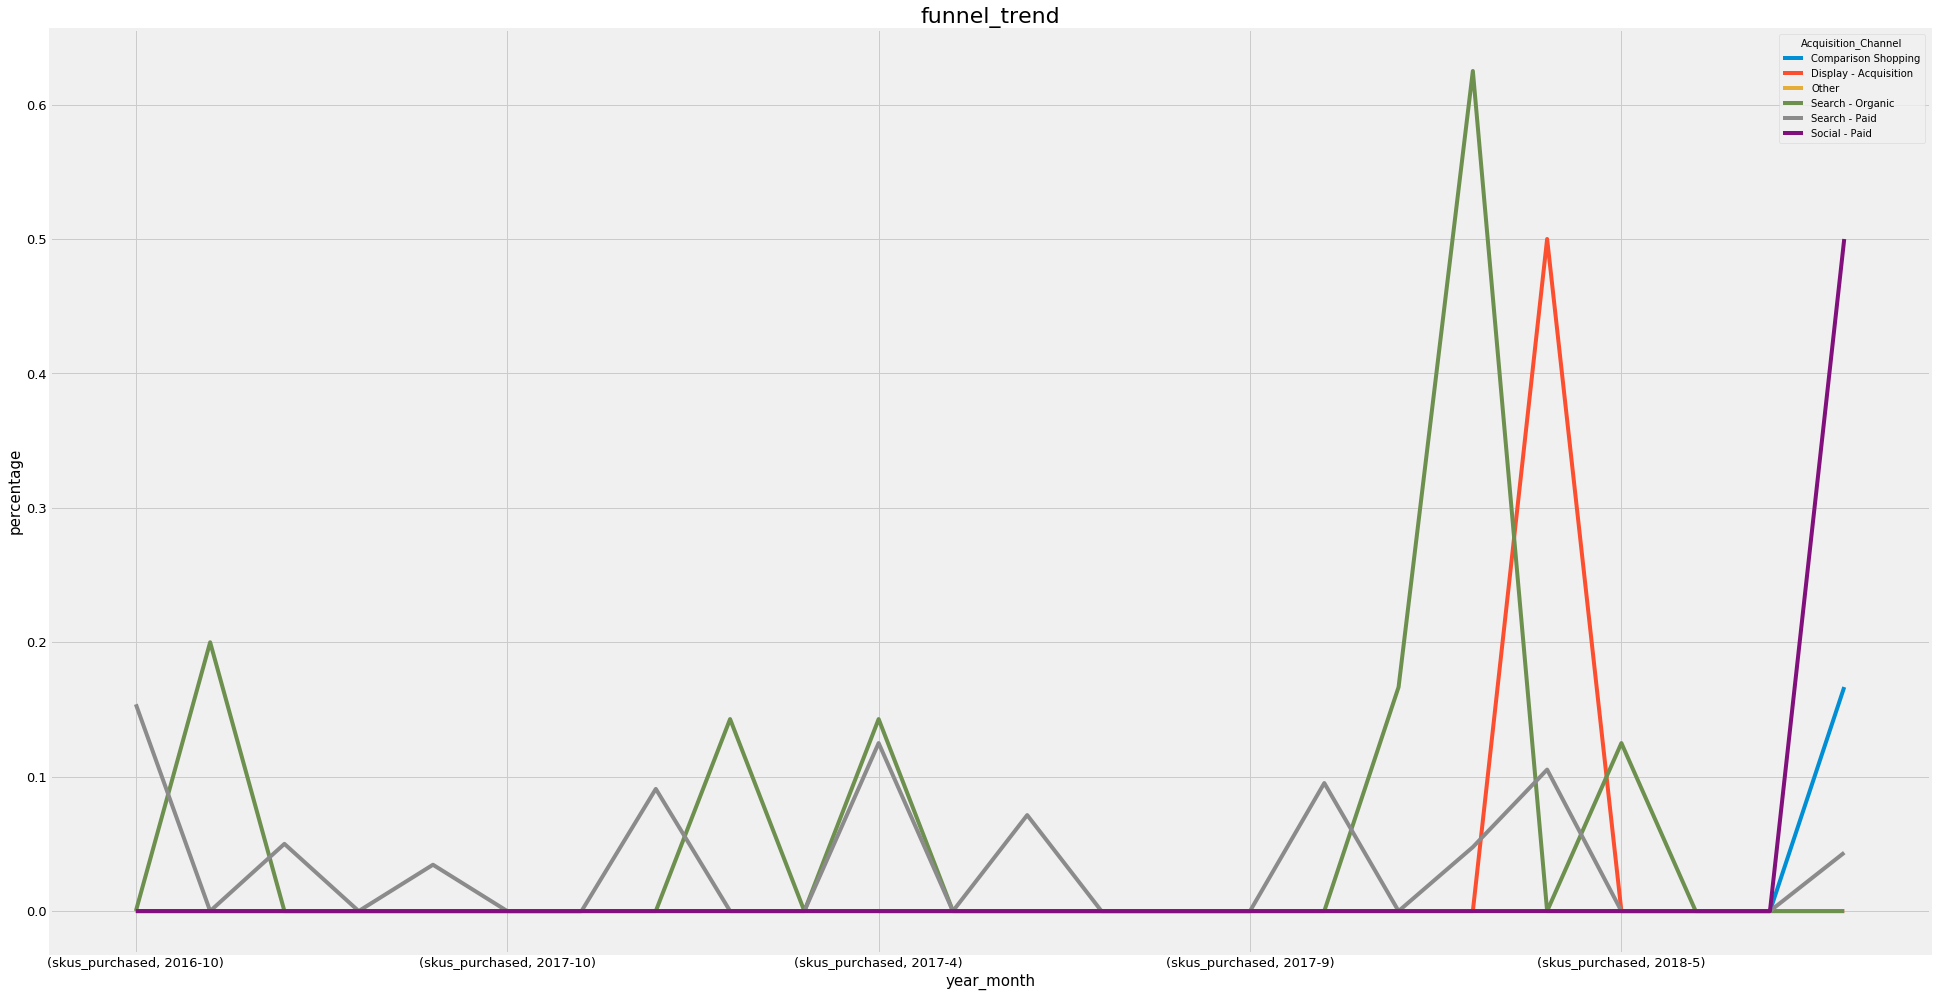

In [466]:
g=f0[['skus_purchased','year_month','Acquisition_Channel']].groupby(['Acquisition_Channel','year_month']).mean()

h=g.unstack()
#transpose 
h1 = h.T
ax = h1.plot(kind='line', figsize=(30,17), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("funnel_trend", fontsize=22)
ax.set_ylabel("percentage", fontsize=15)
ax.set_xlabel("year_month", fontsize=15)
;
plt.show()


In [467]:
#Summary: 
    #showd a regularity trend on all marketing channel, and acquisition, search paid, search organic had a big increase for the pruchased rate in 2018. 

Text(0.5, 1.0, 'Social - Paid')

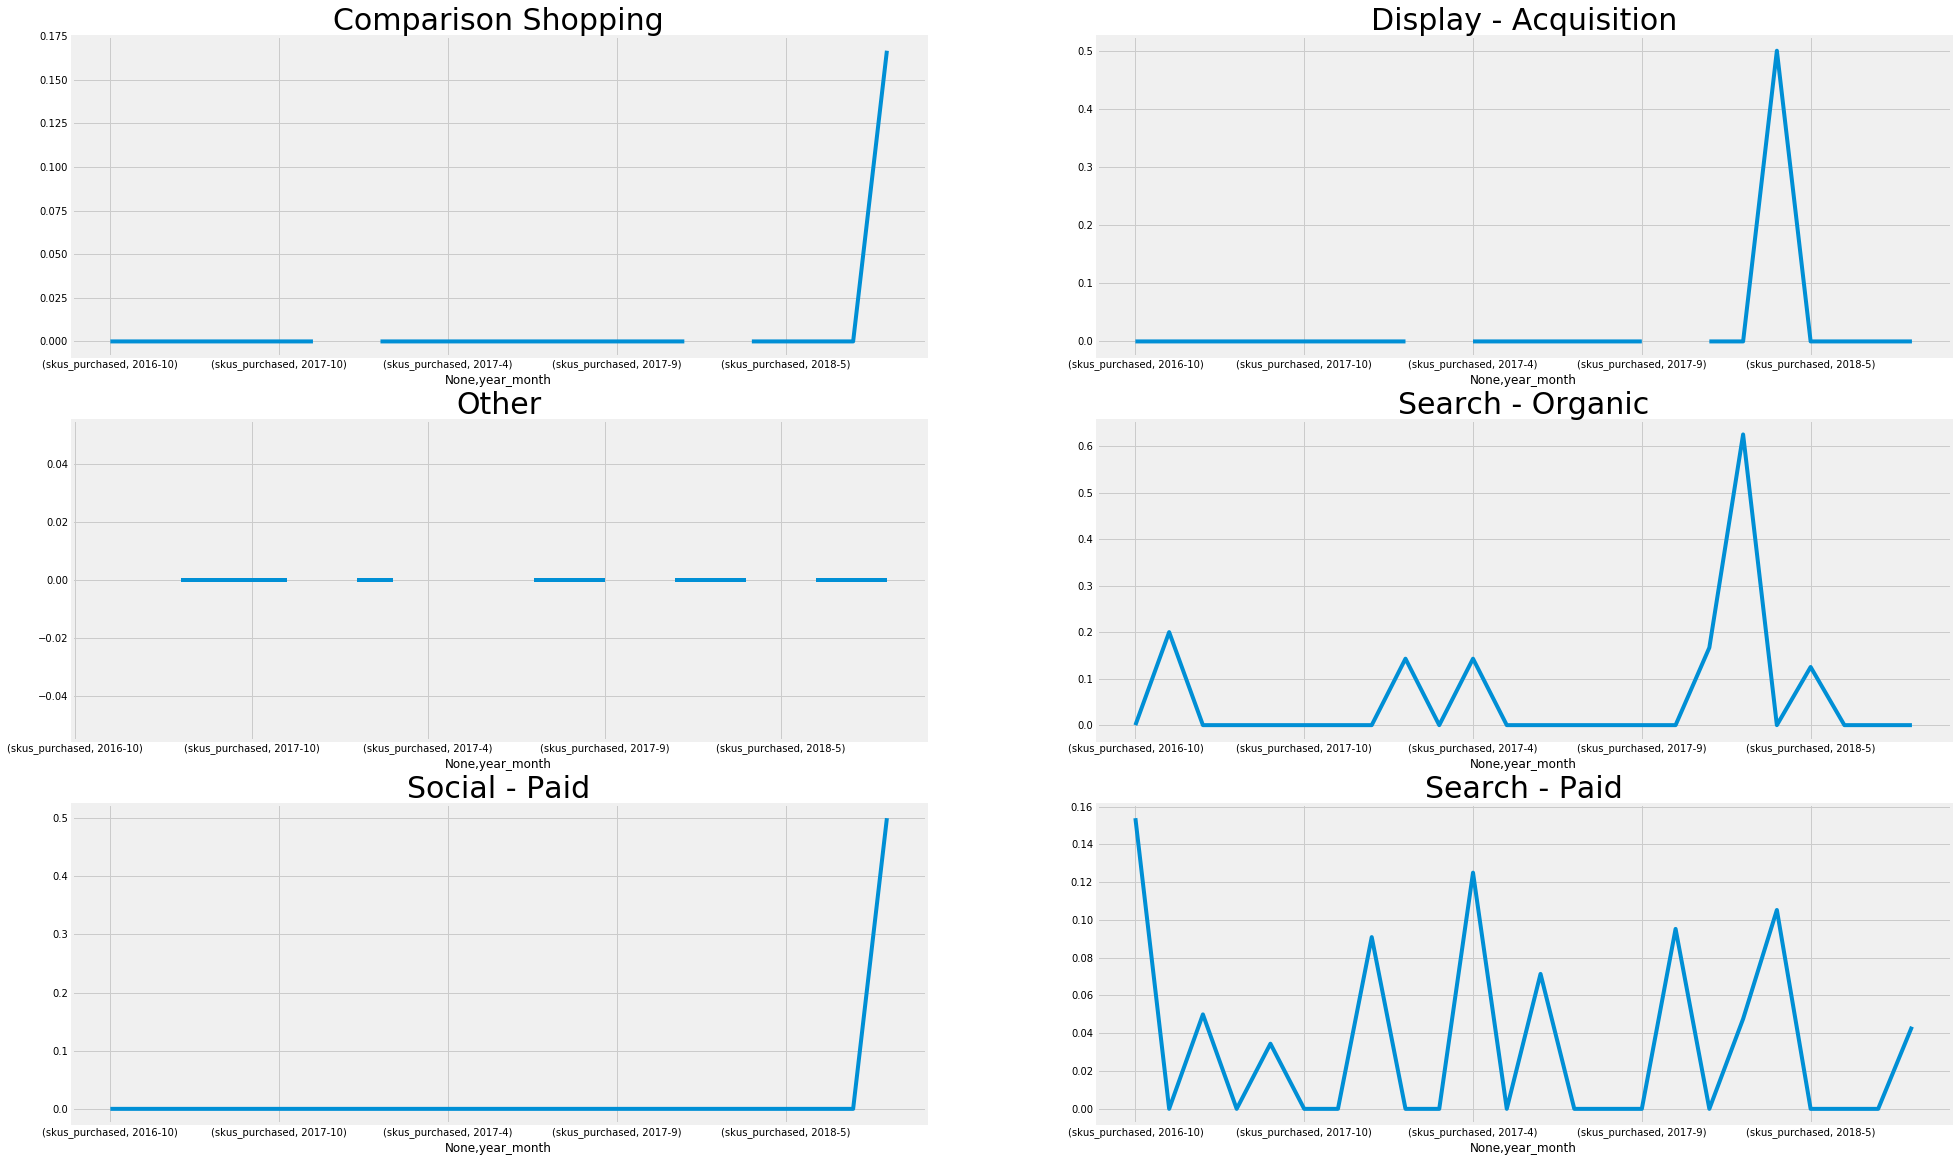

In [468]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(30, 20))

h1['Comparison Shopping'].plot(ax=axes[0,0]); axes[0,0].set_title('Comparison Shopping',size=30)
h1['Display - Acquisition'].plot(ax=axes[0,1]); axes[0,1].set_title('Display - Acquisition',size=30)
h1['Other'].plot(ax=axes[1,0]); axes[1,0].set_title('Other',size=30)
h1['Search - Organic'].plot(ax=axes[1,1]); axes[1,1].set_title('Search - Organic',size=30)
h1['Search - Paid'].plot(ax=axes[2,1]); axes[2,1].set_title('Search - Paid',size=30)
h1['Social - Paid'].plot(ax=axes[2,0]); axes[2,0].set_title('Social - Paid',size=30)





In [469]:
# Acquisition Channel

c = pd.DataFrame(user[['Acquisition_Device']].groupby('Acquisition_Device').size(), columns = ['sum'])
c['pct_of_total'] = c.apply(lambda x: x/x.sum())
d = pd.DataFrame(user[['Acquisition_Device','skus_viewed_flag','skus_added_to_cart_flag','skus_purchased']].groupby('Acquisition_Device').mean())
pd.merge(c,d,right_index = True,left_index = True)

,sum,pct_of_total,skus_viewed_flag,skus_added_to_cart_flag,skus_purchased
Acquisition_Device,,,,,
Desktop,2930,0.738966,0.830034,0.145734,0.058362
Phone,963,0.242875,0.876428,0.186916,0.072690
Tablet,72,0.018159,0.930556,0.180556,0.111111


# Summary: Class_name: Wall Art (low purchased rate) 

1. Search paid had the highest percentage of total but a low skus purchased rate 
2. Search - organic had a high skus addde to cart rate, but a low purchased rate. 
3. histriocal trends showed a regularity peak and down,acquisition, search paid, search organic had a big increase for the pruchased rate in 2018. 
4. Desktop had 74% of total views, but a lowest added to cart rate and also a low purchased rate

# Recommendation: 
1. optimizing the search-organic channel, especially in add to cart stage, and also final purchase stage
2. running more marketing campaigns during the non-peak seaon to drive more visits 
3. Adding more investment on the mobile device, since the purchase conversion rate was higher than desktop